# Signal and Event Analysis

In this part we show basic analysis of the DAS waveforms.

## Phase Following

Follow a coherent phase through a DAS section.

We can laverage the spatial coherency of a DAS data set and follow the onset of a phase through iterative cross-correlation of neighboring traces. The principle workflow is:

1. Get windowed root pick template.
2. Calculate normalized cross correlate with downwards neighbor.
3. Evaluate maximum cross-correlation in allowed window (`max_shift`).
4. Update template trace and go to 2.

5. Repeat for upward neighbors.

## Example 1 - Drop weight vsp-shot

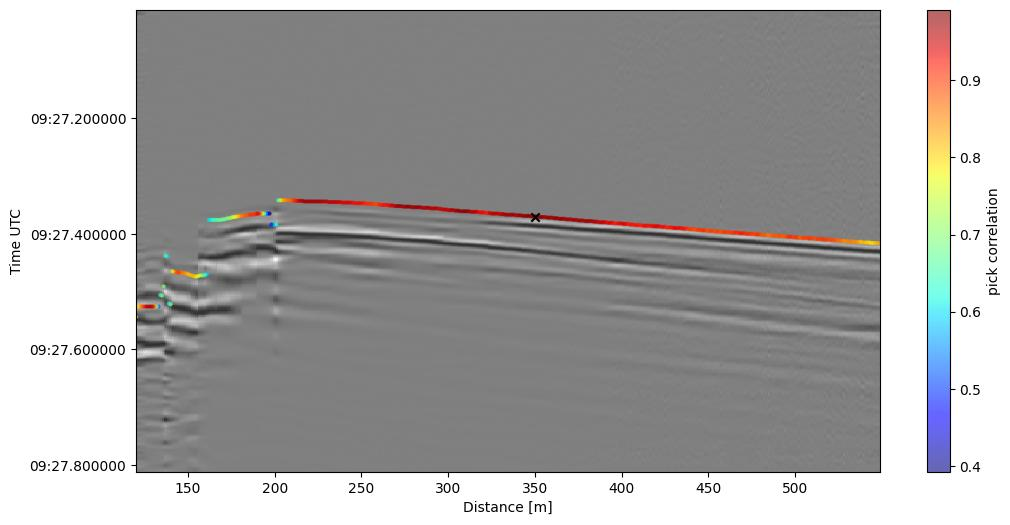

In [83]:
%config InlineBackend.figure_format = 'jpg'
import matplotlib.pyplot as plt
from datetime import timedelta
from lightguide.client import ExampleData
from lightguide.blast import *

# This will download example data
blast = ExampleData.vsp_shot()

# Pre-Processing
blast = blast.trim_channels(begin=120, end=550)
blast = blast.trim_time(begin=1.7, end=2.5)
blast.lowpass(70.0)
blast.afk_filter()

pick_time = blast.start_time + timedelta(seconds=0.359)
pick = Picks(channel=[350],time = [pick_time],phase=['P'],kind=[1])

# Follow the phase from initial pick
picks = blast.follow_phase(
    picks=pick,
    window_size=(50,100),
    max_shift=100,
    threshold=0.05,
    template_stacks=15,
)

fig = plt.figure(figsize=(12, 6))
ax = fig.gca()

blast.plot(axes=ax, cmap="binary", show_date=True)
sc = ax.scatter(picks.channel, picks.time, s=4,c=picks.correlation, cmap="jet", alpha=0.6)
cbar = plt.colorbar(sc)
cbar.set_label("pick correlation")
# # Plot initial pick
ax.scatter(pick.channel, pick.time, marker="x", c="k");

Save picks to a pyrocko markerfile...


In [5]:
filename = 'markers_VSP-DAS-G1-120.txt'
picks.save_picks(filename=filename)

A blast (and the calculated picks) can also be visualized in the snuffler waveform browser or the built-in plot function.

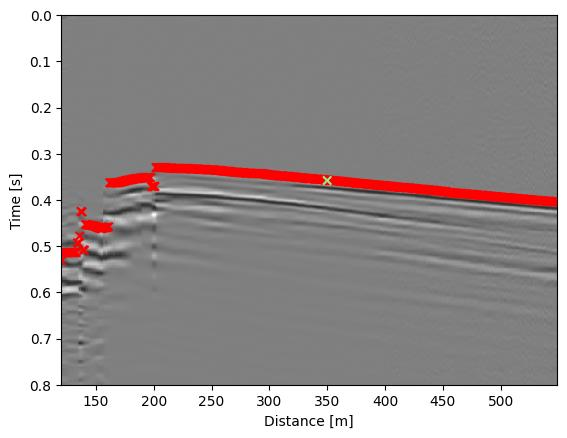

In [88]:
# merge initial pick with picks from phase follow
picks_joined = picks.add(picks=pick)
# built-in plot
blast.plot(picks=picks_joined,cmap='binary')
# snuffler
blast.snuffle(markers=picks_joined.as_markers())


## Example 2 - Icequake

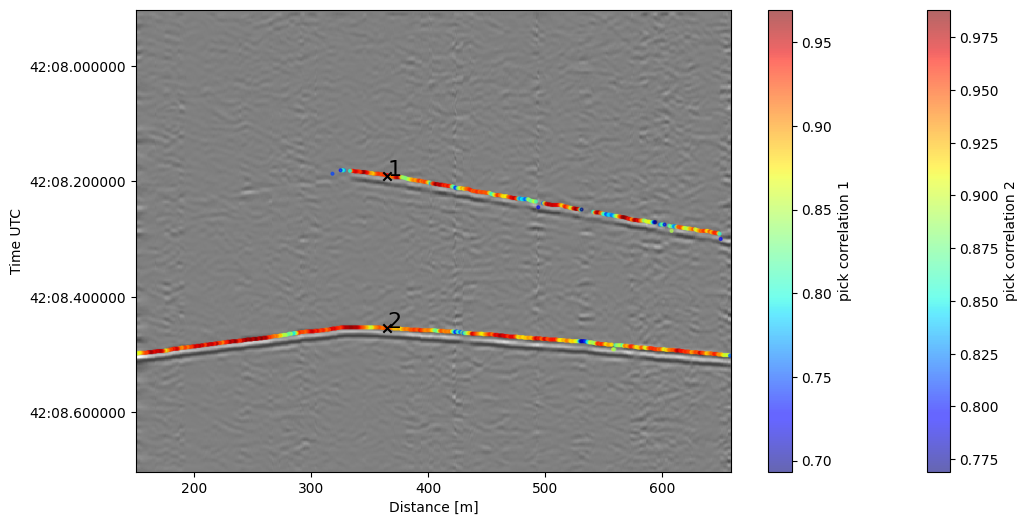

In [73]:
from lightguide.client import ExampleData
from datetime import timedelta
import matplotlib.pyplot as plt
from lightguide.blast import *

# (down)load data
blast = ExampleData.icequake()

# Pre-Processing
blast = blast.trim_channels(begin=150, end=660)
blast = blast.trim_time(begin=0,end=0.8)
blast.lowpass(70.0)
blast.afk_filter()

# define pick times
pick_time1 = blast.start_time + timedelta(seconds=0.288)
pick_time2 = blast.start_time + timedelta(seconds=0.551)
pick1 = Picks(channel=[365],time = [pick_time1],phase=['P'])
pick2 = Picks(channel=[365],time = [pick_time2],phase=['P'])

# Follow the phase from initial pick
picks1 = blast.follow_phase(picks=pick1,
    window_size=20,
    max_shift=10,
    threshold=0.69,
    template_stacks=8,
)
picks2 = blast.follow_phase(picks=pick2,
    window_size=20,
    max_shift=10,
    template_stacks=8,
)

fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
blast.plot(axes=ax, cmap="binary", show_date=True)
sc1 = ax.scatter(picks1.channel, picks1.time, s=4,c=picks1.correlation, cmap="jet", alpha=0.6)
sc2 = ax.scatter(picks2.channel, picks2.time, s=4,c=picks2.correlation, cmap="jet", alpha=0.6)
cbar = plt.colorbar(sc2)
cbar.set_label("pick correlation 2")
cbar = plt.colorbar(sc1)
cbar.set_label("pick correlation 1")
# Plot initial pick
ax.scatter(pick1.channel, pick1.time, marker="x", c="k"),ax.text(pick1.channel[0], pick1.time[0],'1',size=16,c="k")
ax.scatter(pick2.channel, pick2.time, marker="x", c="k"),ax.text(pick2.channel[0], pick2.time[0],'2',size=16,c="k");